In [297]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [298]:
df=pd.read_csv(r"C:\Users\datma003\Desktop\projects1\New\New York Stock\prices-split-adjusted.csv")

In [299]:
df

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [300]:
df.dtypes

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [301]:
df['date'].value_counts()

date
2016-07-27    501
2016-09-12    501
2016-08-23    501
2016-08-24    501
2016-08-25    501
             ... 
2010-03-26    468
2010-03-29    468
2010-03-30    468
2010-02-22    468
2010-01-04    467
Name: count, Length: 1762, dtype: int64

In [302]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [303]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [304]:
df.duplicated().sum()

0

In [305]:
df=df.sort_values(by='date')
df

,date,symbol,open,close,low,high,volume
646,2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0
473,2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0
474,2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0
475,2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0
476,2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0
...,...,...,...,...,...,...,...
850922,2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0
850921,2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0
850920,2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0
850933,2016-12-30,EXR,75.669998,77.239998,75.110001,77.300003,884400.0


<Axes: >

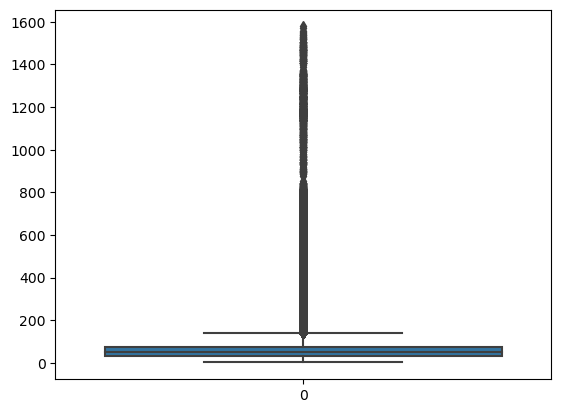

In [306]:
sns.boxplot(df['close'])

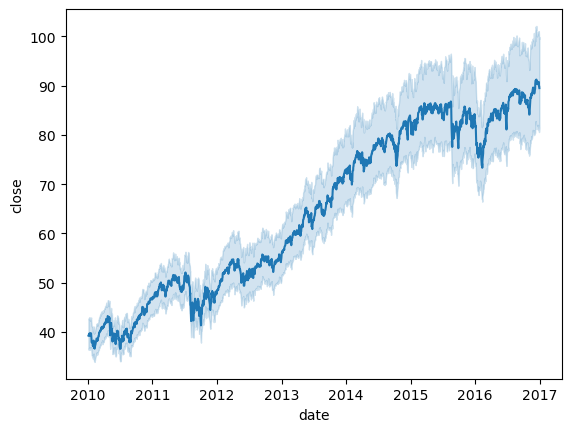

In [307]:
sns.lineplot(data=df, x='date', y='close')
plt.show()

In [308]:
l=['date','close']
df=df[l]
df

,date,close
646,2010-01-04,18.400000
473,2010-01-04,42.009998
474,2010-01-04,30.549999
475,2010-01-04,20.879999
476,2010-01-04,30.809999
...,...,...
850922,2016-12-30,55.230000
850921,2016-12-30,65.400002
850920,2016-12-30,64.360001
850933,2016-12-30,77.239998


In [309]:
df1= df.groupby(df['date'].dt.to_period('M')).agg({'close': 'mean'}).reset_index()
df1

,date,close
0,2010-01,38.893568
1,2010-02,37.845064
2,2010-03,40.340871
3,2010-04,42.239189
4,2010-05,40.140559
...,...,...
79,2016-08,88.735574
80,2016-09,87.782074
81,2016-10,86.847774
82,2016-11,87.485360


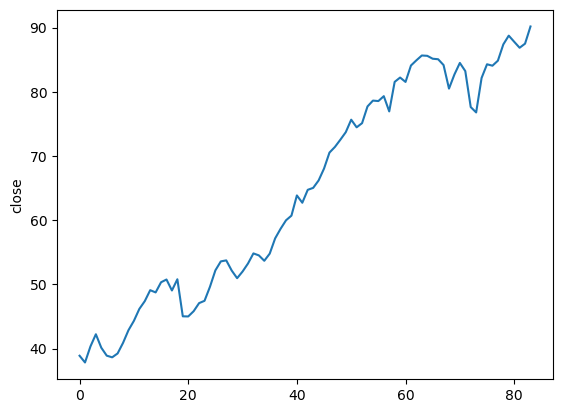

In [310]:
sns.lineplot(df1['close'])
plt.show()

In [311]:
df1

,date,close
0,2010-01,38.893568
1,2010-02,37.845064
2,2010-03,40.340871
3,2010-04,42.239189
4,2010-05,40.140559
...,...,...
79,2016-08,88.735574
80,2016-09,87.782074
81,2016-10,86.847774
82,2016-11,87.485360


In [312]:
df1.dtypes

date     period[M]
close      float64
dtype: object

In [313]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
additive_decomposition=seasonal_decompose(df1['close'],model='additive',period=1)

# Multiplicative Decomposition
multiplicative_decomposition=seasonal_decompose(df1['close'],model='multiplicative',period=1)

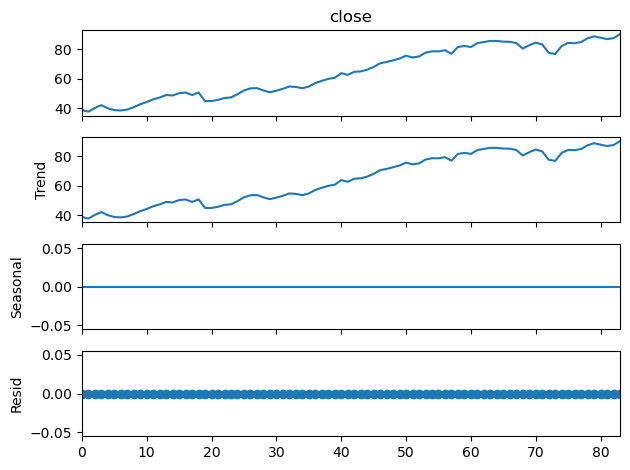

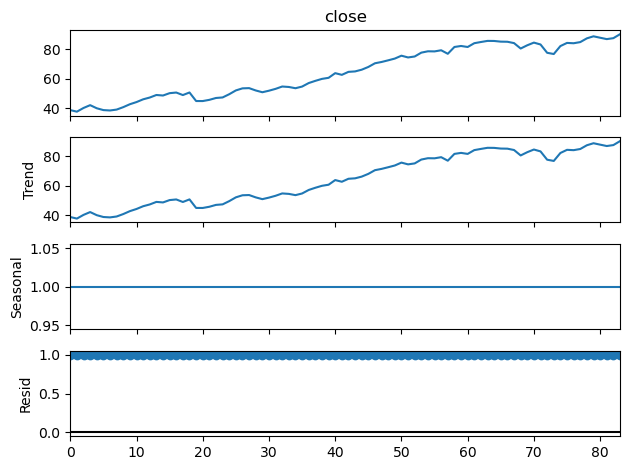

In [314]:
additive_decomposition.plot()
plt.show()
multiplicative_decomposition.plot()
plt.show()

In [315]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def adf_test(data):
    test_1=adfuller(data,autolag='AIC')
    dfoutput = pd.Series(test_1[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    print ('\033[1m'+'Results of ADF Test:'+'\033[0m')
    print(dfoutput)
    
def kpss_test(data):
    test_1=kpss(data)
    dfoutput = pd.Series(test_1[0:3], index=['Test Statistic','p-value','Lags Used'])
    print ('\033[1m'+'Results of KPSS Test:'+'\033[0m')
    print(dfoutput)

In [316]:
# Null Hypothesis: Non-Stationary
# If the p-value is less than 0.05 then reject the null hypothesis (Stationary if p<0.05 & Non-stationary if p>0.05)

adf_test(df1['close'])

Results of ADF Test:
Test Statistic                 -0.492223
p-value                         0.893525
Lags Used                       0.000000
Number of Observations Used    83.000000
dtype: float64


In [317]:
df1['close'].describe()

count    84.000000
mean     64.558150
std      16.885278
min      37.845064
25%      49.498600
50%      64.290701
75%      81.688568
max      90.161394
Name: close, dtype: float64

In [318]:
df1['Log_Values'] = np.log(df1['close'])
df1['1DiffOfLog']= df1['Log_Values'].diff()
df1['Diff']= df1['close'].diff(periods=1)
df1.dropna(inplace=True)
df1

,date,close,Log_Values,1DiffOfLog,Diff
1,2010-02,37.845064,3.633501,-0.027328,-1.048504
2,2010-03,40.340871,3.697365,0.063865,2.495807
3,2010-04,42.239189,3.743348,0.045983,1.898317
4,2010-05,40.140559,3.692387,-0.050961,-2.098629
5,2010-06,38.905884,3.661146,-0.031242,-1.234675
...,...,...,...,...,...
79,2016-08,88.735574,4.485661,0.015497,1.364559
80,2016-09,87.782074,4.474857,-0.010804,-0.953500
81,2016-10,86.847774,4.464157,-0.010700,-0.934300
82,2016-11,87.485360,4.471471,0.007315,0.637586


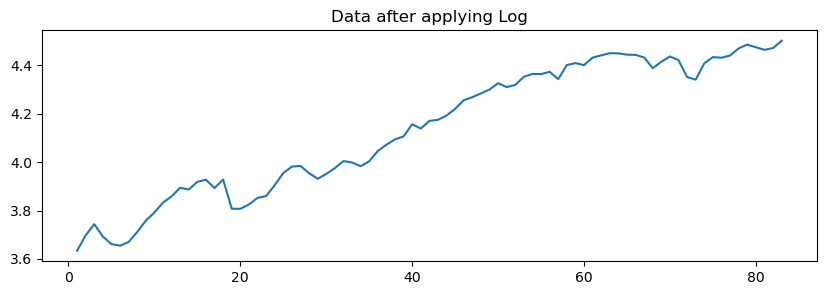

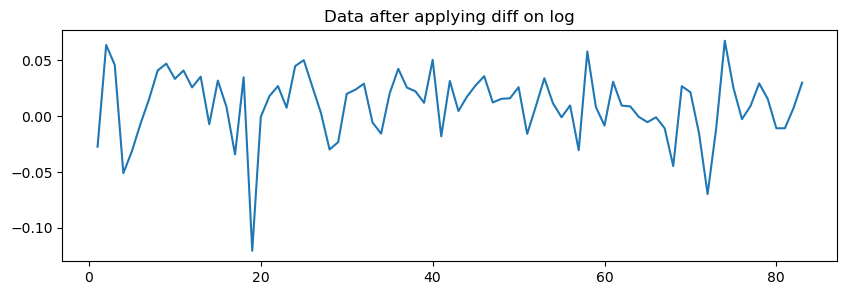

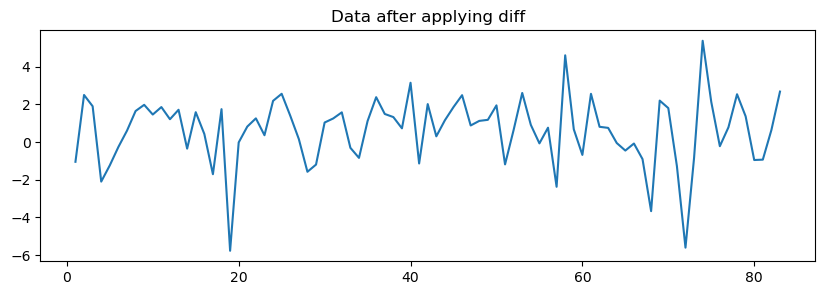

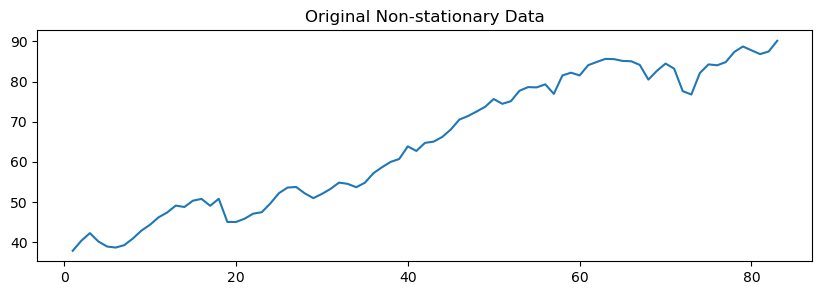

In [319]:
plt.figure(figsize=(10,3))
df1['Log_Values'].dropna().plot()
plt.title("Data after applying Log")
plt.show()

plt.figure(figsize=(10,3))
df1['1DiffOfLog'].dropna().plot()
plt.title("Data after applying diff on log")
plt.show()

plt.figure(figsize=(10,3))
df1['Diff'].dropna().plot()
plt.title("Data after applying diff")
plt.show()

plt.figure(figsize=(10,3))
df1['close'].plot()
plt.title("Original Non-stationary Data")
plt.show()

In [320]:
adf_test(df1['Log_Values'].dropna())
print()
adf_test(df1['1DiffOfLog'])
print()
adf_test(df1['Diff'])

Results of ADF Test:
Test Statistic                 -1.356569
p-value                         0.602911
Lags Used                       0.000000
Number of Observations Used    82.000000
dtype: float64

Results of ADF Test:
Test Statistic                -8.312700e+00
p-value                        3.751594e-13
Lags Used                      0.000000e+00
Number of Observations Used    8.200000e+01
dtype: float64

Results of ADF Test:
Test Statistic                -7.357002e+00
p-value                        9.721131e-11
Lags Used                      1.000000e+00
Number of Observations Used    8.100000e+01
dtype: float64


In [321]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import pacf

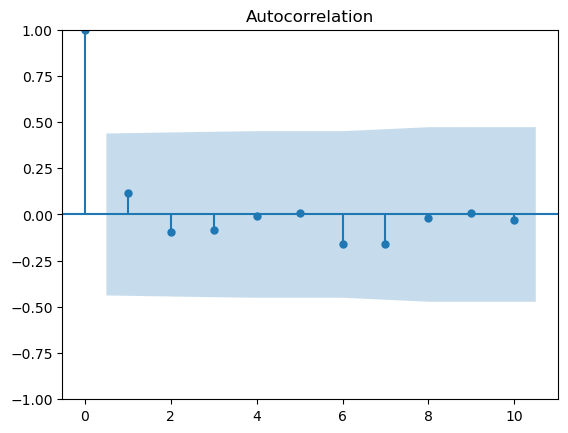

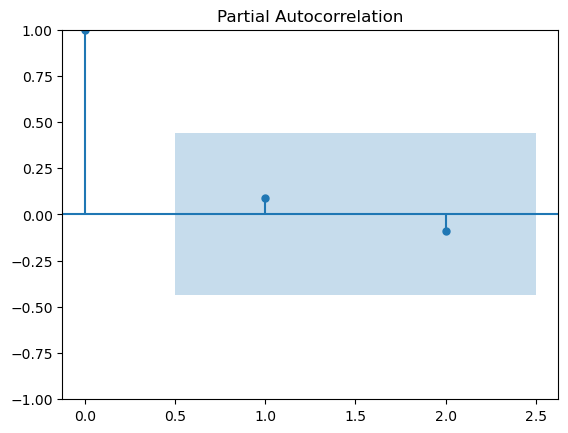

In [322]:
# Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.
# Autocorrelation measures the relationship between a variable's current value and its past values.
# An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of -1 represents a perfect negative correlation.
# Autocorrelation is used to measure how much influence past values for a variable have on its future price.

acf_plot=acf(df1['1DiffOfLog'])
plot_acf(acf_plot)

pacf_plot=pacf(df1['1DiffOfLog'])
plot_pacf(pacf_plot,lags=2);

In [323]:
#pip install pmdarima

In [324]:
# Trace to print the output after every step
# AIC is the score given by the model for every combination of (p,d,q). The goal is to use the order which gives the least AIC

from pmdarima import auto_arima
order=auto_arima(df1['1DiffOfLog'].dropna(),trace=True,suppress_warnings=True)
order.summary()

# Model suggests a best model is with parameters (2,0,0)
# It means that the algorithm is recommending a simple model with no differencing (d=0) 
# autoregressive (AR) & moving average (MA) terms (p=2, q=0).

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-339.842, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-344.016, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-342.550, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-342.687, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-336.903, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-340.969, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.317 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   83
Model:                        SARIMAX   Log Likelihood                 174.008
Date:                Sun, 29 Sep 2024   AIC                           -344.016
Time:                        01:27:55   BIC                           -339.178
Sample:                             0   HQIC                          -342.073
                                 - 83                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0101      0.004      2.641      0.008       0.003       0.018
sigma2         0.0009   9.83e-05      8.997      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                60.24
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -1.22
Prob(H) (two-sided):                  0.09   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [325]:
from statsmodels.tsa.arima.model import ARIMA

In [326]:
train=df1[:62]['1DiffOfLog']
test=df1[62:]['1DiffOfLog']
print(train.shape,test.shape)

(62,) (21,)


In [327]:
train

1    -0.027328
2     0.063865
3     0.045983
4    -0.050961
5    -0.031242
        ...   
58    0.058067
59    0.008239
60   -0.008340
61    0.030895
62    0.009564
Name: 1DiffOfLog, Length: 62, dtype: float64

In [328]:
test

63    0.008803
64   -0.000614
65   -0.005299
66   -0.000930
67   -0.010707
68   -0.044534
69    0.026938
70    0.021537
71   -0.015164
72   -0.069689
73   -0.010846
74    0.067612
75    0.025585
76   -0.002618
77    0.009250
78    0.029438
79    0.015497
80   -0.010804
81   -0.010700
82    0.007315
83    0.030130
Name: 1DiffOfLog, dtype: float64

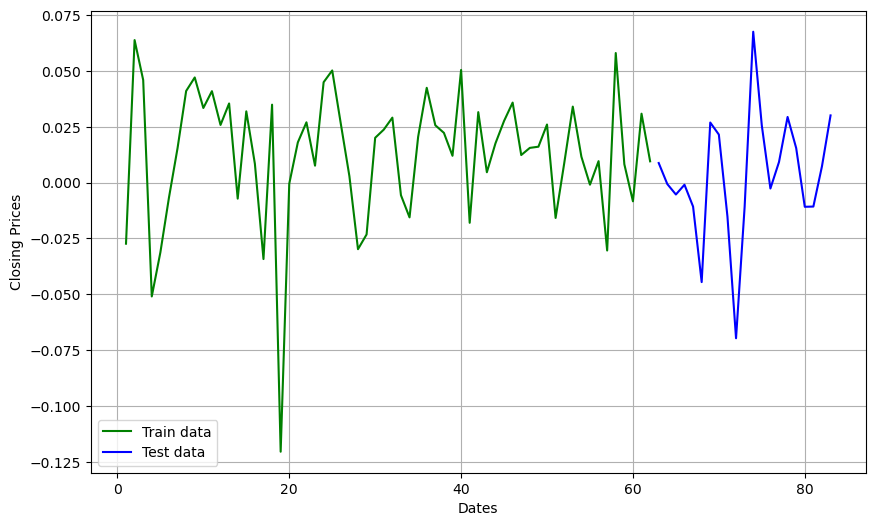

In [329]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train, 'green', label='Train data')
plt.plot(test, 'blue', label='Test data')
plt.legend()

In [449]:
model=ARIMA(train.dropna(),order=(2,1,0))
model=model.fit()

C:\Users\datma003\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\datma003\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\datma003\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [451]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             1DiffOfLog   No. Observations:                   62
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 117.255
Date:                Sun, 29 Sep 2024   AIC                           -228.510
Time:                        01:35:57   BIC                           -222.178
Sample:                             0   HQIC                          -226.029
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6383      0.111     -5.733      0.000      -0.857      -0.420
ar.L2         -0.2985      0.099     -3.002      0.003      -0.493      -0.104
sigma2         0.0012      0.000      6.288      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.19
Prob(Q):                              0.96   Prob(JB):                         0.01
Heteroskedasticity (H):               0.22   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

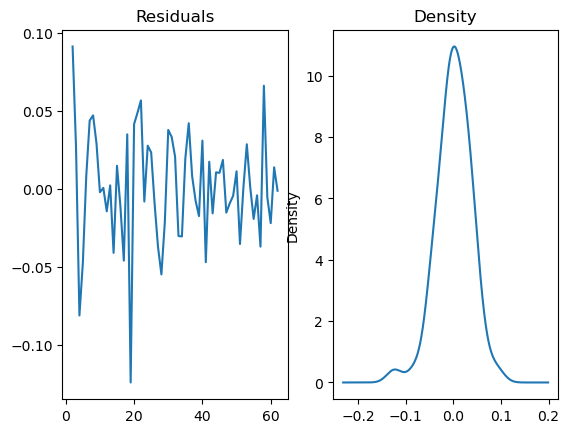

In [453]:
residuals=model.resid[1:]
fig,ax=plt.subplots(1,2)
residuals.plot(title="Residuals",ax=ax[0])
residuals.plot(title="Density",kind='kde',ax=ax[1])
plt.show()

In [455]:
forecast_values = model.forecast(len(test))
print("Forecasted values:", forecast_values.values)
df1['Forecast']=[None]*len(train)+list(forecast_values)
df1

Forecasted values: [0.01146859 0.01662011 0.01276331 0.01368749 0.0142488  0.01361464
 0.01385189 0.01388974 0.01379476 0.01384409 0.01384095 0.01382823
 0.01383729 0.01383531 0.01383387 0.01383538 0.01383484 0.01383473
 0.01383496 0.01383485 0.01383485]


C:\Users\datma003\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\datma003\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,date,close,Log_Values,1DiffOfLog,Diff,Forecast
1,2010-02,37.845064,3.633501,-0.027328,-1.048504,NaN
2,2010-03,40.340871,3.697365,0.063865,2.495807,NaN
3,2010-04,42.239189,3.743348,0.045983,1.898317,NaN
4,2010-05,40.140559,3.692387,-0.050961,-2.098629,NaN
5,2010-06,38.905884,3.661146,-0.031242,-1.234675,NaN
...,...,...,...,...,...,...
79,2016-08,88.735574,4.485661,0.015497,1.364559,0.013835
80,2016-09,87.782074,4.474857,-0.010804,-0.953500,0.013835
81,2016-10,86.847774,4.464157,-0.010700,-0.934300,0.013835
82,2016-11,87.485360,4.471471,0.007315,0.637586,0.013835


In [457]:
prediction_df=pd.DataFrame(forecast_values)
prediction_df['index']=test.index
prediction_df.set_index("index",inplace=True)
prediction_df

,predicted_mean
index,
63,0.011469
64,0.016620
65,0.012763
66,0.013687
67,0.014249
68,0.013615
69,0.013852
70,0.013890
71,0.013795


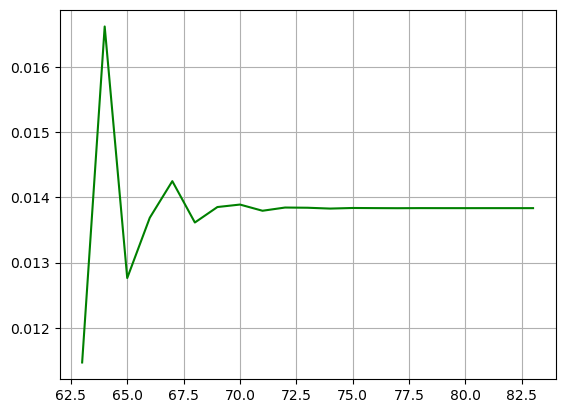

In [459]:
plt.grid(True)
plt.plot(prediction_df['predicted_mean'],'green',label='Prediction')

In [461]:
mae = np.mean(np.abs(prediction_df['predicted_mean'] - test))
print("Mean Absolute Error (MAE):", mae)
mse = ((prediction_df['predicted_mean'] - test) ** 2).mean()
print("Mean Squared Error (MSE):", mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse)

Mean Absolute Error (MAE): 0.022353261004271676
Mean Squared Error (MSE): 0.0008852104497541609
Root Mean Squared Error (RMSE): 0.029752486446583938


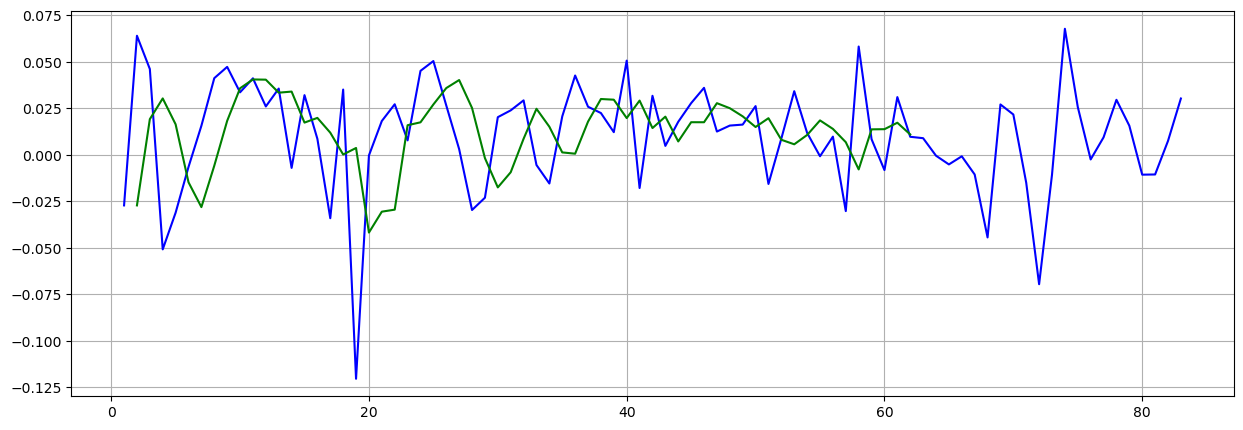

In [463]:
pred=model.predict()
#print(prediction_df),len(prediction_df)
prediction2_df=pd.DataFrame(pred)
prediction2_df['index']=train.index
prediction2_df.set_index("index",inplace=True)
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(df1['1DiffOfLog'],'blue',label='Original Data')
plt.plot(prediction2_df[1:]['predicted_mean'],'green',label='Training')
#plt.plot(prediction_df['predicted_mean'],'red',label='Testing Data')

In [403]:
# Forecast future values beyond the testing dataset
future_forecast = model.forecast(steps=30)
print("Forecasted values:", future_forecast)


Forecasted values: 62    0.011469
63    0.016620
64    0.012763
65    0.013687
66    0.014249
67    0.013615
68    0.013852
69    0.013890
70    0.013795
71    0.013844
72    0.013841
73    0.013828
74    0.013837
75    0.013835
76    0.013834
77    0.013835
78    0.013835
79    0.013835
80    0.013835
81    0.013835
82    0.013835
83    0.013835
84    0.013835
85    0.013835
86    0.013835
87    0.013835
88    0.013835
89    0.013835
90    0.013835
91    0.013835
Name: predicted_mean, dtype: float64


C:\Users\datma003\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\datma003\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [405]:
new_list=list(test.index)+[i for i in range(82,91)]
new_list

[63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90]

In [407]:
forecast_df=pd.DataFrame(future_forecast)
forecast_df['index']=new_list
forecast_df.set_index("index",inplace=True)
forecast_df=forecast_df[-8:]
forecast_df

,predicted_mean
index,
83,0.013835
84,0.013835
85,0.013835
86,0.013835
87,0.013835
88,0.013835
89,0.013835
90,0.013835


Text(0.5, 1.0, 'Line plot for the upcoming years stock price')

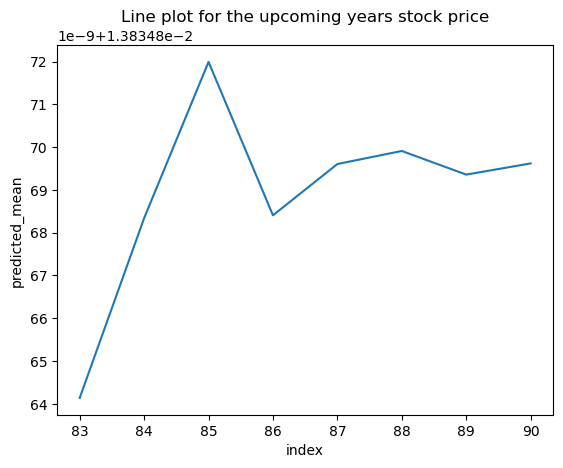

In [409]:
sns.lineplot(forecast_df['predicted_mean'])
plt.title("Line plot for the upcoming years stock price")